In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("CaliforniaHousing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [5]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]
print(X) #X는 소득 중앙값(medinc)부터 longitude까지(설명변수)
print(y) #y는 MedHouseVal(목적변수)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coef = pd.Series(model.coef_, index=X.columns)
print(f"MAPE: {mape:.4f}")
print(f"R2: {r2:.4f}")
print(coef)
#훈련데이터 8할, 테스트데이터 2할 나누고 모델링
#mape:평균절대비오차, 오차가 예측값에서 차지하는 %, 0에 가까울 수록 좋음, 걍 오차

MAPE: 0.3233
R2: 0.5943
MedInc        0.433333
HouseAge      0.009293
AveRooms     -0.098643
AveBedrms     0.593215
Population   -0.000008
AveOccup     -0.004745
Latitude     -0.421449
Longitude    -0.434166
dtype: float64


In [9]:
def fit(df):
    X=df[df.columns[:-1]]
    y=df[df.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coef = pd.Series(model.coef_, index=X.columns)
    print(f"MAPE: {mape:.4f}")
    print(f"R2: {r2:.4f}")
    print(coef)
    return coef
coef=fit(df)

MAPE: 0.3233
R2: 0.5943
MedInc        0.433333
HouseAge      0.009293
AveRooms     -0.098643
AveBedrms     0.593215
Population   -0.000008
AveOccup     -0.004745
Latitude     -0.421449
Longitude    -0.434166
dtype: float64


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

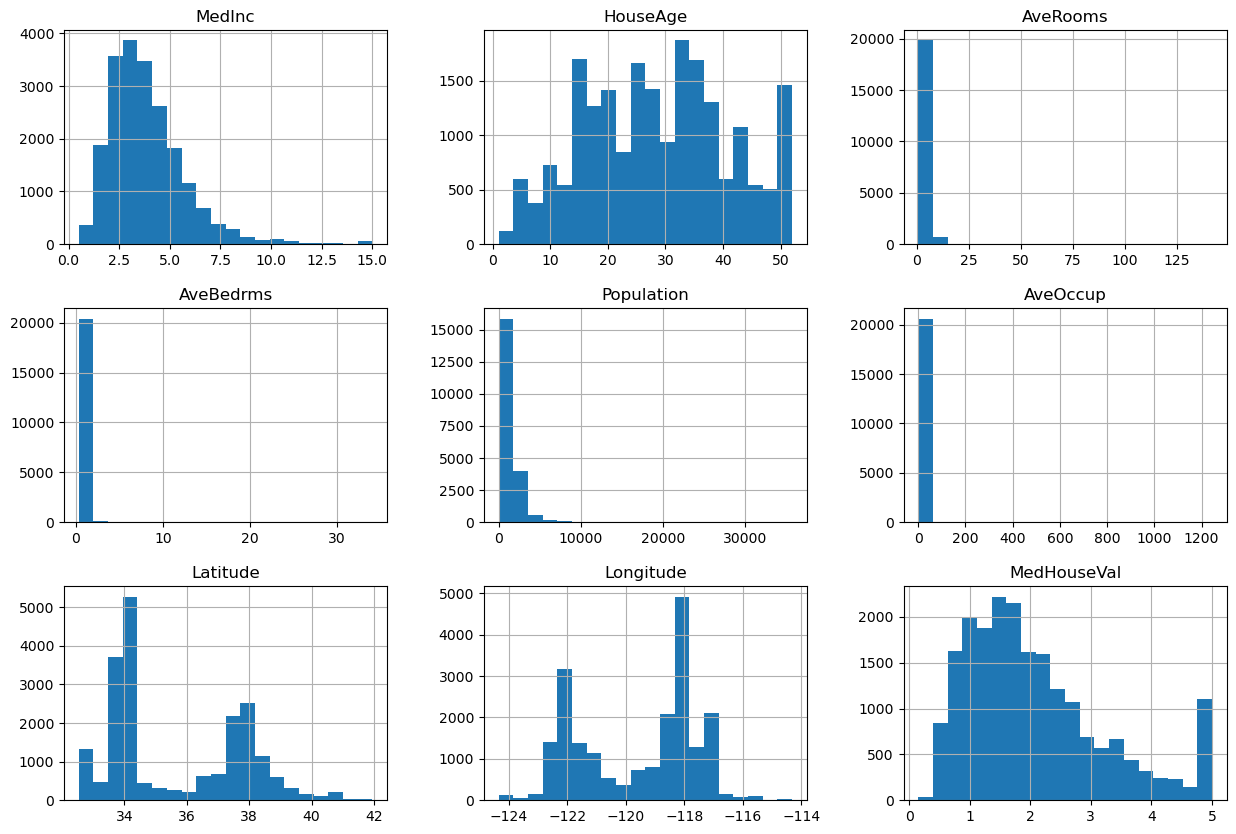

In [13]:
df.hist(bins=20, figsize=(15, 10))

In [15]:
print(df["AveRooms"].quantile(0.99))
print(df["AveBedrms"].quantile(0.99))
print(df["Population"].quantile(0.99))
print(df["AveOccup"].quantile(0.99))
#0.01퍼센트에 있는 이상치 제거

10.357033023735813
2.127540822838997
5805.830000000002
5.394812032520327


In [16]:
cond1 = (df["MedHouseVal"] <= 5)
cond2 = (df["AveRooms"] <= df["AveRooms"].quantile(0.99))
cond3 = (df["AveBedrms"] <= df["AveBedrms"].quantile(0.99))
cond4 = (df["Population"] <= df["Population"].quantile(0.99))
cond5 = (df["AveOccup"] <= df["AveOccup"].quantile(0.99))
df_prep = df.loc[cond1 & cond2 & cond3 & cond4 & cond5]
df_prep.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000,19055.000000
mean,3.675348,28.662136,5.210592,1.064349,1377.220310,2.912624,35.648000,-119.579213,1.931627
std,1.563962,12.421668,1.165471,0.116880,866.285478,0.695460,2.144714,2.005519,0.980969
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.525450,18.000000,4.410857,1.004938,802.000000,2.443988,33.930000,-121.790000,1.163000
50%,3.449000,29.000000,5.169444,1.047521,1175.000000,2.832461,34.270000,-118.510000,1.746000
75%,4.583300,37.000000,5.940678,1.096614,1720.000000,3.289391,37.730000,-118.010000,2.500000
max,15.000100,52.000000,10.352941,2.127208,5804.000000,5.392954,41.950000,-114.550000,5.000000


In [18]:
coef=fit(df_prep)
#회귀계수가 0에 가까운 houseage랑 populationg은 제거해야함

MAPE: 0.2841
R2: 0.6330
MedInc        0.439034
HouseAge      0.010457
AveRooms     -0.118551
AveBedrms     0.992037
Population    0.000061
AveOccup     -0.331091
Latitude     -0.389385
Longitude    -0.384806
dtype: float64


In [19]:
df_prep.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.190894,0.649235,-0.216189,0.022075,-0.050018,-0.076290,-0.012013,0.645892
HouseAge,-0.190894,1.000000,-0.248163,-0.123627,-0.302350,0.009745,0.007206,-0.097342,0.071101
AveRooms,0.649235,-0.248163,1.000000,0.235711,-0.061418,-0.020085,0.141528,-0.085187,0.255673
AveBedrms,-0.216189,-0.123627,0.235711,1.000000,-0.029029,-0.112976,0.073320,0.000426,-0.124288
Population,0.022075,-0.302350,-0.061418,-0.029029,1.000000,0.203531,-0.123834,0.113899,0.003050
AveOccup,-0.050018,0.009745,-0.020085,-0.112976,0.203531,1.000000,-0.183452,0.192360,-0.264670
Latitude,-0.076290,0.007206,0.141528,0.073320,-0.123834,-0.183452,1.000000,-0.928329,-0.148697
Longitude,-0.012013,-0.097342,-0.085187,0.000426,0.113899,0.192360,-0.928329,1.000000,-0.044890
MedHouseVal,0.645892,0.071101,0.255673,-0.124288,0.003050,-0.264670,-0.148697,-0.044890,1.000000


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_prep[df_prep.columns[:-1]]
df_vif = pd.DataFrame()
df_vif.index = X.columns
df_vif["Coefficient"] = coef
df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
df_vif
#다중공선성 판별

,Coefficient,VIF
MedInc,0.439034,17.594523
HouseAge,0.010457,7.818422
AveRooms,-0.118551,56.868174
AveBedrms,0.992037,125.369512
Population,0.000061,4.219317
AveOccup,-0.331091,20.737068
Latitude,-0.389385,623.919518
Longitude,-0.384806,963.073803
